In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from load_results import load_setup_1, load_setup_2, PARAM_COLUMNS, RESULT_COLUMNS, FITNESS_FUNCTIONS

%matplotlib inline

In [89]:
df = pd.concat([load_setup_1(), load_setup_2()])
df.fitness_function = df.fitness_function.map(lambda value: value.replace(' function', ''))
df.head()

,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,Booth's,False,-,-,13,5,0.5,1.5,0.1,-,0.984780,1.0,500.0,0.000000,9.090909
1,Booth's,False,-,-,13,5,0.5,1.5,0.5,-,0.998687,1.0,500.0,0.454545,19.090909
2,Booth's,False,-,-,13,5,0.5,1.5,0.9,-,1.000000,1.0,500.0,1.000000,44.181818
3,Booth's,False,-,-,13,5,1.0,1.0,0.1,-,0.985024,1.0,500.0,0.000000,13.727273
4,Booth's,False,-,-,13,5,1.0,1.0,0.5,-,0.998192,1.0,500.0,0.272727,89.818182


In [90]:
df = df[~df.use_constraint]
df.groupby('fitness_function')[RESULT_COLUMNS].mean()

,fitness,optimum_reached,iterations_to_opt
fitness_function,,,
Booth's,0.998066,0.659238,23.036948
Schwefel,0.957514,0.587663,70.963552
Shubert,0.895960,0.590930,35.371349


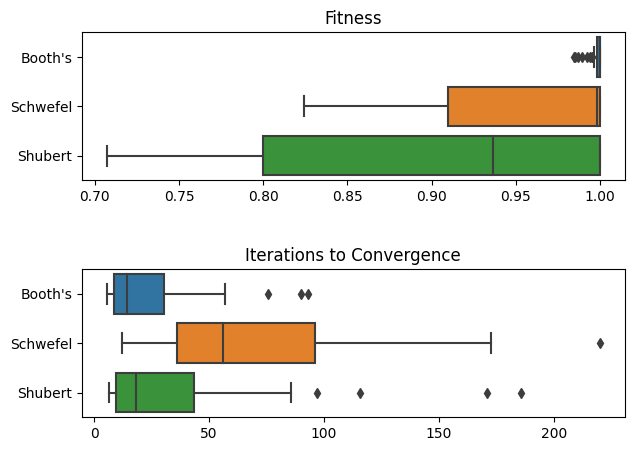

In [94]:
figure, axes = plt.subplots(2, 1, figsize=(7, 5))
plt.subplots_adjust(hspace = 0.6)
sns.boxplot(
    data=df,
    x='fitness',
    y='fitness_function',
    ax=axes[0])
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].set_title('Fitness')
sns.boxplot(
    data=df,
    x='iterations_to_opt',
    y='fitness_function',
    ax=axes[1])
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].set_title('Iterations to Convergence')
plt.savefig('./plots/compare_fitness_functions')

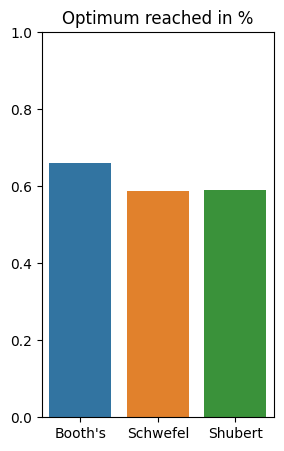

In [93]:
figure, ax = plt.subplots(figsize=(3, 5))
sns.barplot(
    data=df,
    x='fitness_function',
    y='optimum_reached',
    errorbar=None)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Optimum reached in %')
plt.savefig('./plots/compare_fitness_functions_opt')